In [3]:
import pandas as pd
import numpy as np
import math
from math import ceil, floor

In [4]:
# first I want to view each as a slice to see what I'm dealing with
ex_nuc = pd.read_csv("/Users/esthomas/Mirror/Andor_Rotation/github_repo/3D_cells/G05_multiOrganelles_Linked/0_prediction_c0.model.p_cell_1_coordinates.csv")
ex_nuc = ex_nuc.astype(float)
ex_nuc.head()

,y,x,z
0,19.0,360.0,0.0
1,20.0,355.0,0.0
2,20.0,356.0,0.0
3,20.0,357.0,0.0
4,20.0,361.0,0.0


In [5]:
# get max and min of x and y
minx = np.min(ex_nuc["x"])
print(np.max(ex_nuc["x"]))
miny = np.min(ex_nuc["y"])
print(np.max(ex_nuc["y"]))
print(np.max(ex_nuc["z"]))

364.0
34.0
31.0


In [6]:
# give padding leeway on both sides

image_base = np.zeros((50, 50))
x_padding = (50 - (np.max(ex_nuc["x"]) - np.min(ex_nuc["x"])))/2
y_padding = (50 - (np.max(ex_nuc["y"]) - np.min(ex_nuc["y"])))/2
x_left, x_right = ceil(x_padding), floor(x_padding)
y_left, y_right = ceil(y_padding), floor(y_padding)


In [7]:
# create new coordinates

ex_nuc["new_y"] = ex_nuc["y"] - miny + y_left
ex_nuc["new_x"] = ex_nuc["x"] - minx + x_left

image_set = []
for i in set(ex_nuc["z"].values):
    image_base = np.zeros((50, 50))
    for row in range(0, len(ex_nuc["z"])):
        if ex_nuc["z"].values[row] == i:
            image_base[int(ex_nuc["new_x"].values[row]),int(ex_nuc["new_y"].values[row])] = 1
        else:
            pass
    image_set.append(image_base)


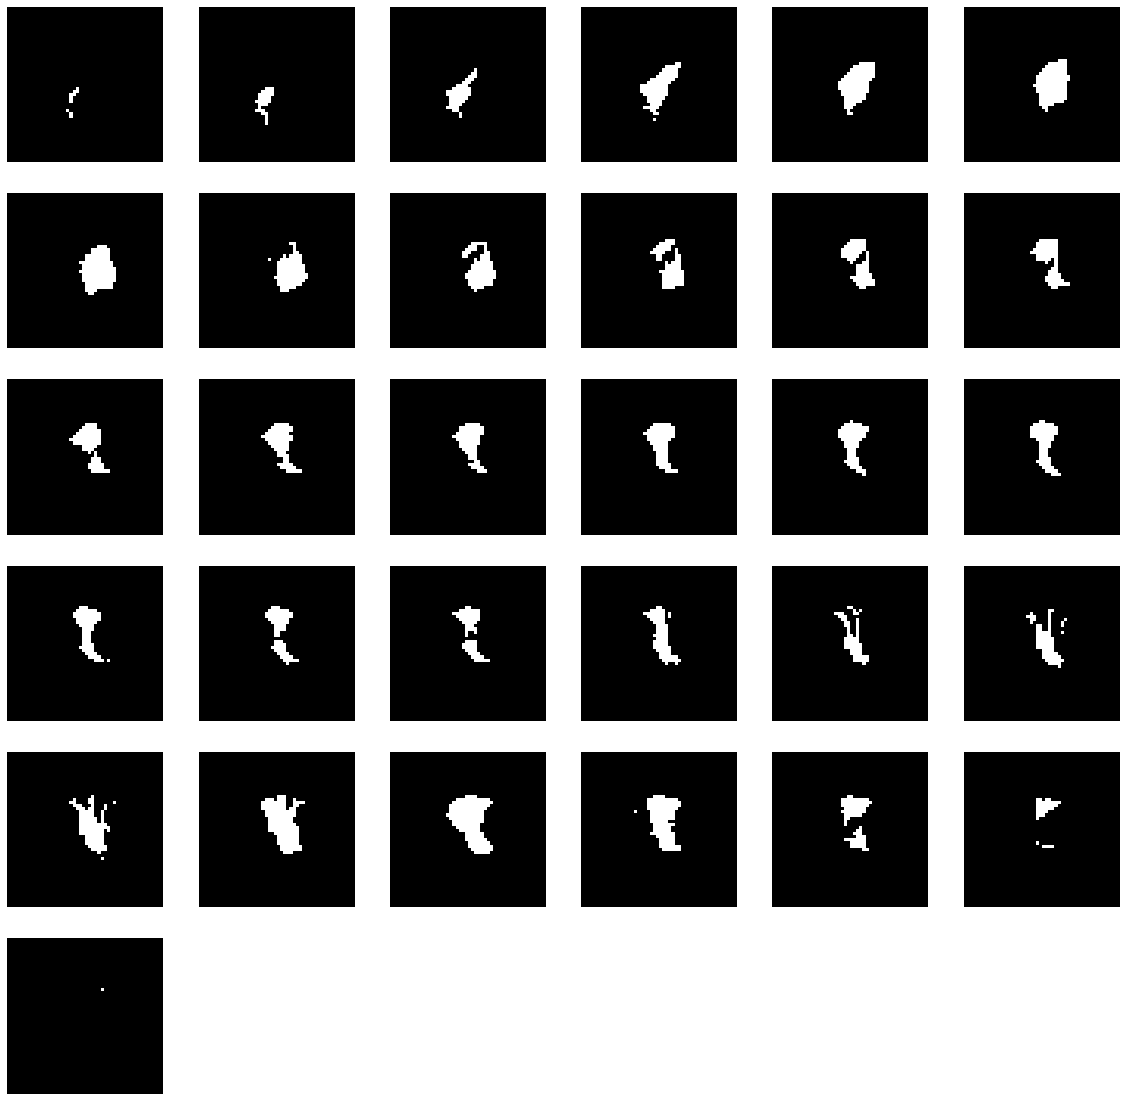

In [8]:
import matplotlib.pyplot as plt

# plt.imshow(image_set[15], cmap="gray") #Greys is inverse
'''
fig, axs = plt.subplots(5, ceil(int(np.max(ex_nuc["z"].values))/5))
for i in range(0, int(np.max(ex_nuc["z"].values))):
    axs[i].imshow(image_set[i])
    plt.show()
'''
fig = plt.figure(figsize=(20, 20))
for i in range(0, len(image_set)):
    img = image_set[i]
    plt.subplot(6,6,i+1)
    plt.axis("off")
    plt.imshow(img, cmap="gray")


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure

In [10]:
from skimage.draw import ellipsoid


# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(6, 10, 16, levelset=True)
ellip_double = np.concatenate((ellip_base[:-1, ...],
                               ellip_base[2:, ...]), axis=0)

In [11]:
ex = np.stack(image_set)
print(ex)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


/var/folders/p1/99sndrn56lv71k57w35yh8n40000gn/T/ipykernel_20684/3659925199.py:2: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, normals, values = measure.marching_cubes_lewiner(ex, 0)


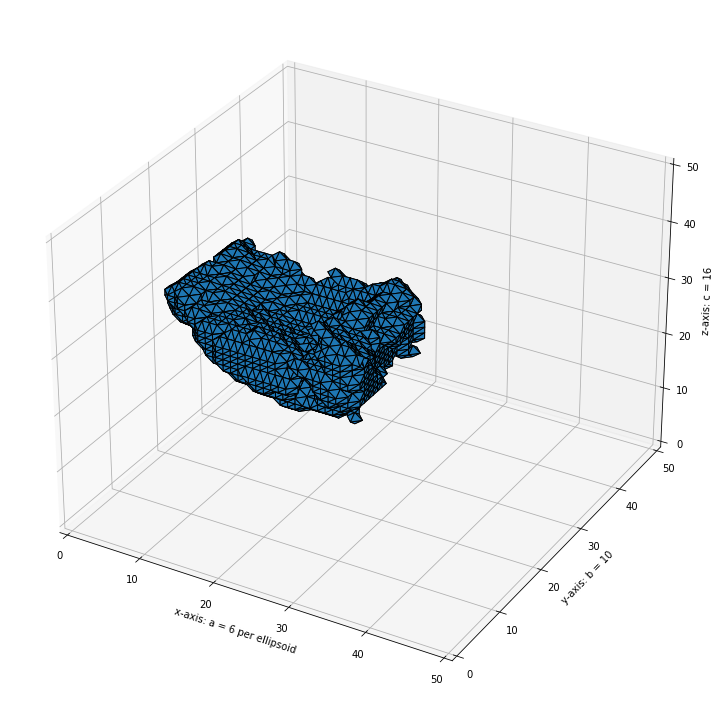

In [12]:

# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes_lewiner(ex, 0)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)


ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 50)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 50)  # b = 10
ax.set_zlim(0, 50)  # c = 16


plt.tight_layout()
plt.show()

In [54]:
import numpy as np
from skimage import measure
from scipy.interpolate import griddata
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.colors import LightSource

coor =0.2
phi=0.2
j = np.linspace(0, 1, 50)
# Generate an grid to inerpolate to
X, Y, Z = np.meshgrid(j, j, j)

# Interpolate (coor and phi are the numerical grid and scalar values)
F = griddata(coor, phi, (X, Y, Z), method='nearest')

# Make the contour, marching cubes
marchCubeSpace = 1.0 / 50.0
verts, faces, normals, values = measure.marching_cubes_lewiner(F, 0.5, spacing=(marchCubeSpace, marchCubeSpace, marchCubeSpace))

# Create Ploy3D and set up a light source
mesh = Poly3DCollection(verts[faces], alpha=1.0)
ls = LightSource(azdeg=225.0, altdeg=45.0)

# First change - normals are per vertex, so I made it per face.
normalsarray = np.array([np.array((np.sum(normals[face[:], 0]/3), np.sum(normals[face[:], 1]/3), np.sum(normals[face[:], 2]/3))/np.sqrt(np.sum(normals[face[:], 0]/3)**2 + np.sum(normals[face[:], 1]/3)**2 + np.sum(normals[face[:], 2]/3)**2)) for face in faces])

# Next this is more asthetic, but it prevents the shadows of the image being too dark. (linear interpolation to correct)
min = np.min(ls.shade_normals(normalsarray, fraction=1.0)) # min shade value
max = np.max(ls.shade_normals(normalsarray, fraction=1.0)) # max shade value
diff = max-min
newMin = 0.3
newMax = 0.95
newdiff = newMax-newMin

# Using a constant color, put in desired RGB values here.
colourRGB = np.array((255.0/255.0, 54.0/255.0, 57/255.0, 1.0))

# The correct shading for shadows are now applied. Use the face normals and light orientation to generate a shading value and apply to the RGB colors for each face.
rgbNew = np.array([colourRGB*(newMin + newdiff*((shade-min)/diff)) for shade in ls.shade_normals(normalsarray, fraction=1.0)])

# Apply color to face
mesh.set_facecolor(rgbNew)

# Plot
fig = plt.figure()
ax = fig.add_subplot(0, 0, 0, projection='3d')
ax.add_collection3d(mesh)

IndexError: tuple index out of range

In [ ]:

import vtk
from vtk.util import numpy_support
import numpy as np
   

data = ex

floatArray = vtk.vtkFloatArray() # the VTK array
floatArray.SetName("My array")
floatArray.SetNumberOfComponents(1)
floatArray.SetArray(data, 3, False) # False because we do not take the ownership

mydata.GetPointData().SetScalars(floatArray); # give the array to the dataset

colorFunc = vtk.vtkColorTransferFunction()
# colorFunc.AddRGBPoint(1, 1, 0.0, 0.0) # Red
colorFunc.AddRGBPoint(2, 0.0, 1, 0.0) # Green

opacity = vtk.vtkPiecewiseFunction()

volumeProperty = vtk.vtkVolumeProperty()
volumeProperty.SetColor(colorFunc)
volumeProperty.SetScalarOpacity(opacity)
volumeProperty.SetInterpolationTypeToLinear()
volumeProperty.SetIndependentComponents(2)

volumeMapper = vtk.vtkOpenGLGPUVolumeRayCastMapper()
volumeMapper.SetInputData(imdata)
volumeMapper.SetBlendModeToMaximumIntensity()


volume = vtk.vtkVolume()
volume.SetMapper(volumeMapper)
volume.SetProperty(volumeProperty)

ren = vtk.vtkRenderer()
ren.AddVolume(volume)
ren.SetBackground(0,0,0)

renWin = vtk.vtkRenderWindow()
renWin.AddRenderer(ren)
renWin.SetSize(900, 900)

interactor = vtk.vtkRenderWindowInteractor()
interactor.SetRenderWindow(renWin)

interactor.Initialize()
renWin.Render()
interactor.Start()

In [49]:
import plotly.graph_objects as go

x, y, z = zip(*verts) 
print(values)

fig = go.Figure(data=go.Isosurface(
    x=x,
    y=y,
    z=z,
    value=values,
    isomin=0.1,
    isomax=0.8,
    opacity=1, # needs to be small to see through all surfaces
    surface_count=17, # needs to be a large number for good volume rendering
    ))
fig.show()

[1. 1. 1. ... 1. 1. 1.]


In [38]:
import plotly.graph_objects as go

x, y, z = zip(*verts) 

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, alphahull=5, opacity=0.4, color='cyan')])

fig.show()

In [39]:
cpos = [(-381.74, -46.02, 216.54), (74.8305, 89.2905, 100.0), (0.23, 0.072, 0.97)]

mesh.plot(volume=True, cmap="bone", cpos=cpos)

AttributeError: 'Poly3DCollection' object has no attribute 'plot'

In [33]:
import plotly as py
from plotly.graph_objs import *


x, y, z = zip(*verts) 

colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']
fig = py.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap=colormap,
                        simplices=faces,
                        title="Isosurface")
py.iplot(fig)

AttributeError: module 'plotly' has no attribute 'create_trisurf'

In [12]:

'''import pyvista as pv

surf = pv.PolyData(verts, faces)

pl = pv.Plotter(shape=(1,1))
pl.add_mesh(surf, color=True, show_edges=True)
# plot each face with a different color
pl.show()'''

'import pyvista as pv\n\nsurf = pv.PolyData(verts, faces)\n\npl = pv.Plotter(shape=(1,1))\npl.add_mesh(surf, color=True, show_edges=True)\n# plot each face with a different color\npl.show()'

In [13]:
import pyvista as pv

data = pv.wrap(ex)
data.plot(volume=True) # Volume render

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [15]:
vshape = tuple(reversed(ex.shape))
if len(vshape) == 3:
  # Scalar volume
  vcomponents = 1
elif len(vshape) == 4:
  # Vector volume
  vcomponents = vshape[0]
  vshape = vshape[1:4]
else:
  # TODO: add support for tensor volumes
  raise RuntimeError("Unsupported numpy array shape: "+str(narray.shape))

vimage = volumeNode.GetImageData()
if not vimage:
  import vtk
  vimage = vtk.vtkImageData()
  volumeNode.SetAndObserveImageData(vimage)
import vtk.util.numpy_support
vtype = vtk.util.numpy_support.get_vtk_array_type(narray.dtype)

NameError: name 'volumeNode' is not defined

In [17]:
%gui wx
import mayavi
import mayavi.mlab

ERROR:root:Cannot activate multiple GUI eventloops


In [18]:
mayavi.mlab.triangular_mesh([vert[0] for vert in verts],
                 [vert[1] for vert in verts],
                 [vert[2] for vert in verts],
                 normals)
mayavi.mlab.savefig("Output\\Trabecular_Mask\\trabecular_model.obj")

qt.qpa.window: <QNSWindow: 0x7f87b9935fc0; contentView=<QNSView: 0x7f87b994e410; QCocoaWindow(0x6000003ec0b0, window=QWidgetWindow(0x60000104e6a0, name="QMainWindowClassWindow"))>> has active key-value observers (KVO)! These will stop working now that the window is recreated, and will result in exceptions when the observers are removed. Break in QCocoaWindow::recreateWindowIfNeeded to debug.


ValueError: The triangles array has negative values